In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

from utils import dataset

In [15]:
# siren_file = "./data/ESC-50-master/audio/2-70052-B-42.wav"
# siren_file = "./data/ESC-50-master/audio/2-70938-A-42.wav"
# siren_file = "./data/ESC-50-master/audio/1-76831-C-42.wav"
# siren_file = "./data/ESC-50-master/audio/3-62878-B-42.wav"
siren_file = "./data/ESC-50-master/audio/4-67358-A-42.wav"
car_horn_file = "./data/ESC-50-master/audio/2-54086-A-43.wav"

In [14]:
ipd.Audio(siren_file)

Text(0.5, 1.0, 'Siren signal waveform and frame RMS')

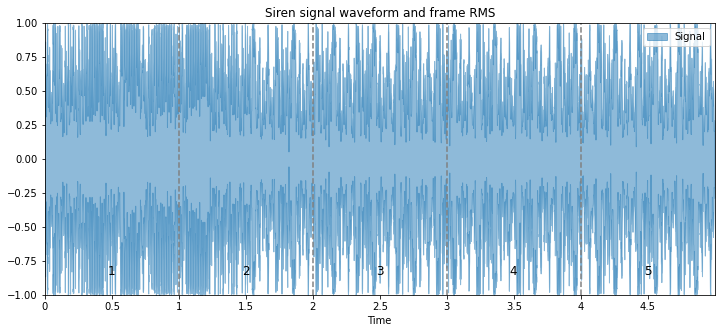

In [44]:
ipd.Audio(car_horn_file)

In [43]:
siren_original, sr = librosa.load(siren_file)
car_horn_original, sr = librosa.load(car_horn_file)

In [4]:
FRAME_LENGTH = 22050
HOP_LENGTH = 512

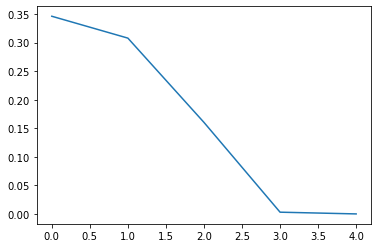

In [30]:
rms_siren = librosa.feature.rms(siren, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH, center=False)[0]
plt.plot(rms_siren.T)

In [75]:
rms_siren = [3.4620440e-01, 3.4620440e-01, 3.0787793e-01, 3.0787793e-01, 1.6028513e-01, 1.6028513e-01, 3.0365610e-03, 3.0365610e-03, 4.3708606e-06, 4.3708606e-06]
rms_siren_scatter = [3.4620440e-01, 3.0787793e-01,  1.6028513e-01, 3.0365610e-03, 4.3708606e-06]

t = np.array([0, 1, 1, 2, 2, 3, 3, 4, 4, 5])
t_scatter = np.array([0.5, 1.5, 2.5, 3.5, 4.5])


In [48]:
frames = range(len(rms_siren))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

Text(0.5, 1.0, 'Siren signal waveform and frame RMS')

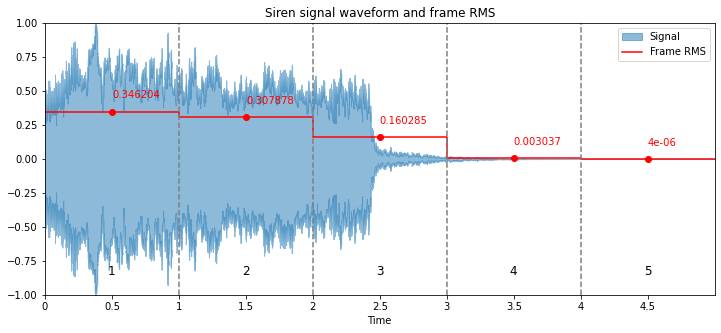

In [87]:
font = {
        'size': 12,
        }
        
plt.figure(figsize=(12, 5))
librosa.display.waveplot(siren, alpha=0.5, label='Signal')
plt.plot(t, rms_siren, color="r", label='Frame RMS')
plt.scatter(t_scatter, rms_siren_scatter, color='r')
plt.vlines(x=[1,2,3,4], ymin=-1, ymax=1, color='gray', ls='--')
for i in range(len(rms_siren_scatter)):
    plt.annotate(round(rms_siren_scatter[i], 6), (t_scatter[i], rms_siren_scatter[i] + 0.1), color='r')
plt.text(0.47, -0.85, '1', fontdict=font)
plt.text(1.47, -0.85, '2', fontdict=font)
plt.text(2.47, -0.85, '3', fontdict=font)
plt.text(3.47, -0.85, '4', fontdict=font)
plt.text(4.47, -0.85, '5', fontdict=font)
plt.legend()
plt.ylim((-1, 1))
plt.title("Siren signal waveform and frame RMS")

In [45]:
siren = siren_original[:22050]
car_horn = car_horn_original[:22050]

Text(0.5, 1.0, 'Two signals mix up')

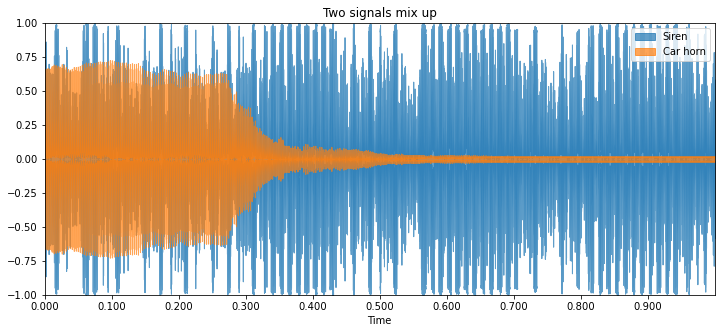

In [46]:
plt.figure(figsize=(12, 5))
librosa.display.waveplot(siren, alpha=0.7, label='Siren')
librosa.display.waveplot(car_horn, alpha=0.7, label='Car horn')
plt.legend()
plt.ylim((-1, 1))
plt.title("Two signals mix up")

In [83]:
20 * np.log10(np.max(car_horn))

-2.771506905555725

In [ ]:
label = (eye[label] * ratio + eye[mixup_label] * (1 - ratio))


0.0754161
-2.7715073
0.41878473586277554


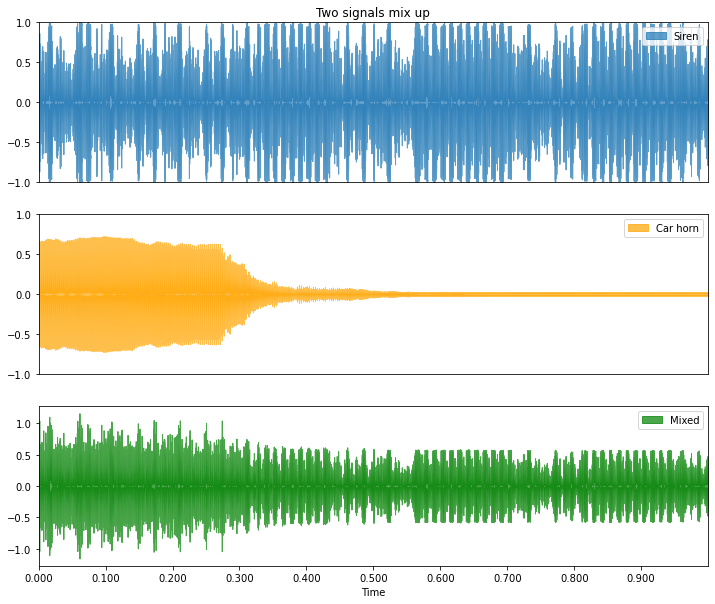

In [63]:
siren = siren_original[:22050]
car_horn = car_horn_original[:22050]

gain_signal = np.max(librosa.amplitude_to_db(siren, top_db=80))
print(gain_signal)
gain_mixup_signal = np.max(librosa.amplitude_to_db(car_horn, top_db=80))
print(gain_mixup_signal)

ratio = 0.5

p = 1.0 / (1 + np.power(10, (gain_signal - gain_mixup_signal) / 20.) * (1 - ratio) / ratio)
print(p)

# siren = ((siren * p ) / np.sqrt(p ** 2 + (1 - p) ** 2))
# # siren = siren/siren.max()
# car_horn = ((car_horn * (1 - p) ) / np.sqrt(p ** 2 + (1 - p) ** 2))
# # car_horn = car_horn/car_horn.max()

signal = ((siren * p + car_horn * (1 - p)) / np.sqrt(p ** 2 + (1 - p) ** 2))

plt.figure(figsize=(12, 10))
plt.subplot(311)
librosa.display.waveplot(siren, alpha=0.7, label='Siren')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.legend()
plt.ylim((-1, 1))
plt.title("Two signals mix up")
plt.subplot(312)
librosa.display.waveplot(car_horn, alpha=0.7, label='Car horn', color='orange')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.legend()
plt.ylim((-1, 1))
plt.subplot(313)
signal = ((siren * p + car_horn * (1 - p)) / np.sqrt(p ** 2 + (1 - p) ** 2))
librosa.display.waveplot(signal, alpha=0.7, label='Mixed',color='green')
plt.legend()


In [65]:
from scipy.io.wavfile import write

rate = 22050
scaled = np.int16(signal / np.max(np.abs(signal)) * 32767)
write('test.wav', rate, scaled)



In [52]:
test_file = "./data/ESC-50-master/audio/1-76831-E-42.wav"
test, sr = librosa.load(test_file)

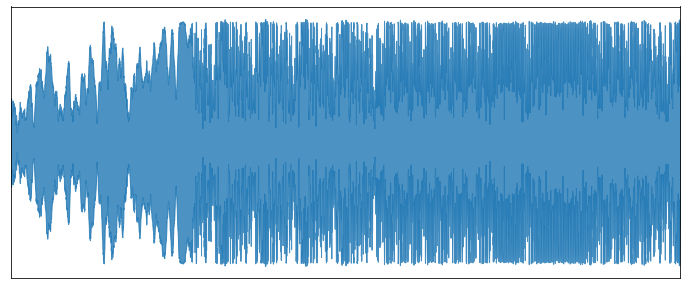

In [55]:
plt.figure(figsize=(12, 5))

librosa.display.waveplot(test,  alpha=0.8)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)


In [12]:
import pandas as pd

df = pd.read_csv('./signal.csv')
test = df['signal'].to_numpy()

Text(0.5, 0, 'Time [s]')

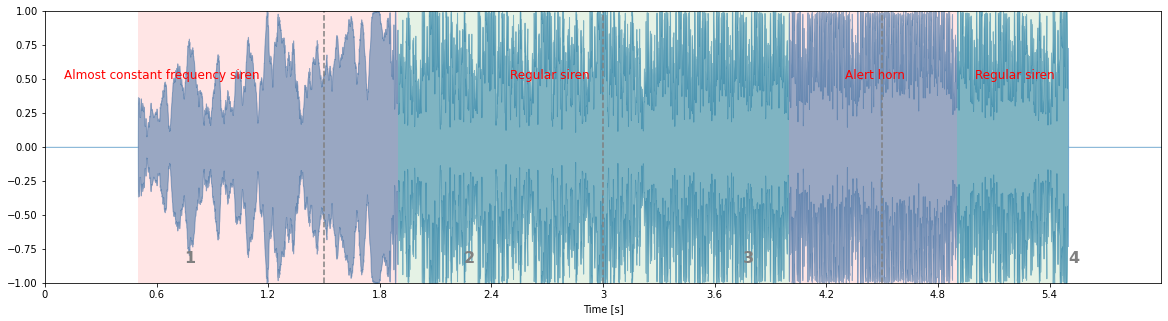

In [68]:
font = {
        'size': 16,
        'color': 'gray',
        'weight': 'bold'
        }

font_region = {
        'size': 12,
        'color': 'red'
        }
        
plt.figure(figsize=(20, 5))
librosa.display.waveplot(test, alpha=0.5, label='Signal', sr=16000)
plt.vlines(x=[1.5,3,4.5], ymin=-1, ymax=1, color='gray', ls='--')
plt.text(0.75, -0.85, '1', fontdict=font)

plt.text(0.1, 0.5, 'Almost constant frequency siren', fontdict=font_region)
plt.axvspan(0.5, 1.9, facecolor='red', alpha=0.1)

plt.text(2.5, 0.5, 'Regular siren', fontdict=font_region)
plt.axvspan(1.9, 4, facecolor='green', alpha=0.1)

plt.text(2.25, -0.85, '2', fontdict=font)

plt.text(4.3, 0.5, 'Alert horn', fontdict=font_region)
plt.axvspan(4, 4.9, facecolor='red', alpha=0.1)


plt.text(5, 0.5, 'Regular siren', fontdict=font_region)
plt.axvspan(4.9, 5.5, facecolor='green', alpha=0.1)


plt.text(3.75, -0.85, '3', fontdict=font)
plt.text(5.5, -0.85, '4', fontdict=font)
plt.ylim((-1, 1))
plt.xlabel('Time [s]')

In [36]:
len(test)

4.35374149659864

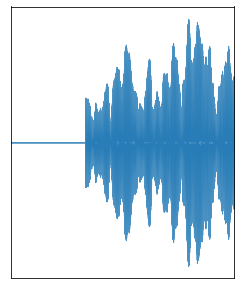

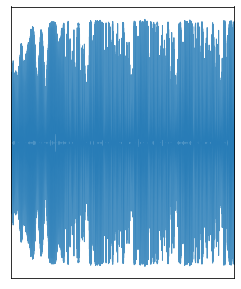

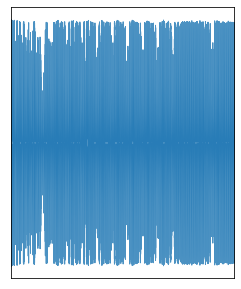

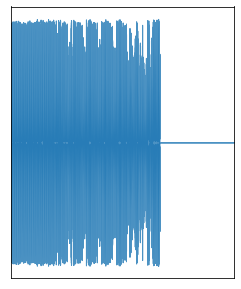

In [51]:
for i in range(0, len(test), 24000):
    plt.figure(figsize=(4, 5))
    librosa.display.waveplot(test[i:i+24000],  alpha=0.8)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

    # plt.ylim((-1, 1))

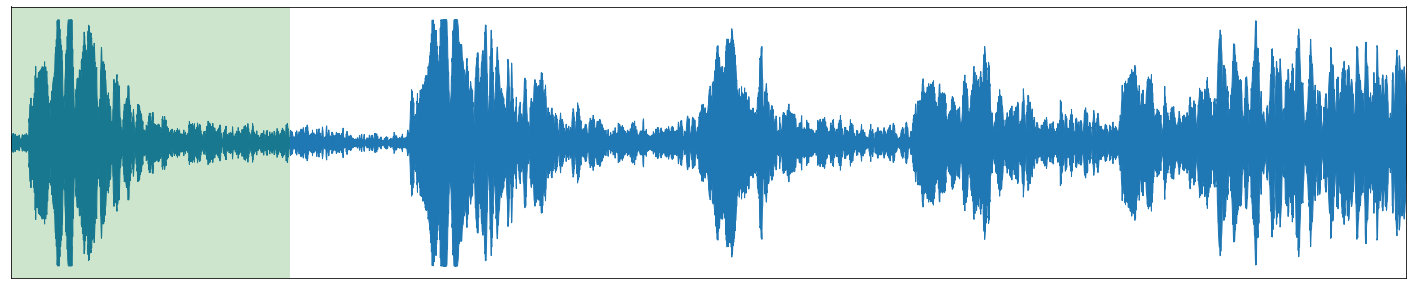

In [3]:
siren = "C:/Users/davis/projects/acoustic_alert_detector/data/ESC-50-master/audio/1-31482-A-42.wav" 
siren, sr = librosa.load(siren)
plt.figure(figsize=(25, 5))
librosa.display.waveplot(siren, alpha=1)
plt.axvspan(0, 1, facecolor='green', alpha=0.2)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

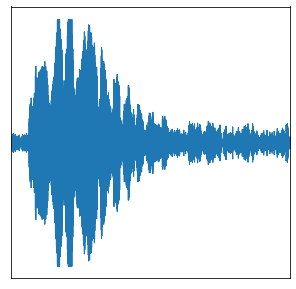

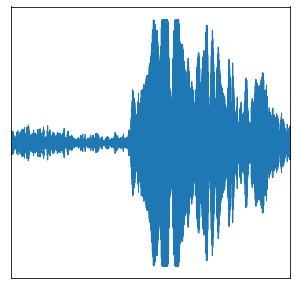

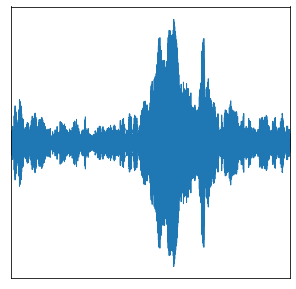

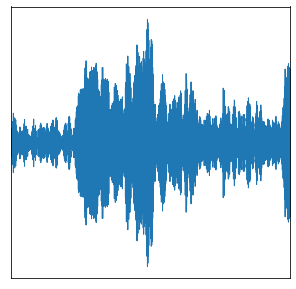

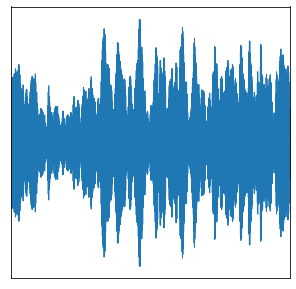

In [12]:

for i in range(0,5):
    plt.figure(figsize=(5, 5))
    librosa.display.waveplot(siren[22050*i:22050*(i+1)], alpha=1)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.show()

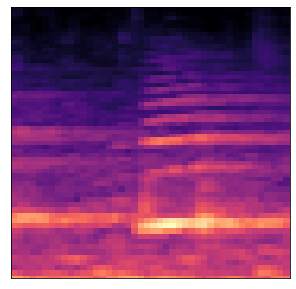

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
M = librosa.feature.melspectrogram(y=siren[2*22050:2*22050+22050], sr=sr ,n_mels=64)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
# fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)

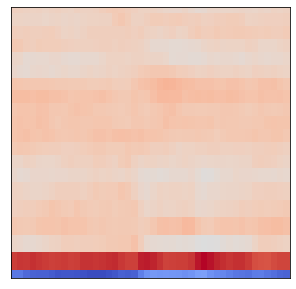

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
M = librosa.feature.mfcc(y=siren[2*22050:2*22050+22050], sr=sr ,n_mels=64)
img = librosa.display.specshow(M, y_axis='mel', x_axis='time', ax=ax)
# fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)